## Assignment 6

### Task 1

<img src="1.png" width="60%" />

We will be solving LP problem in it's standard formulation via interior-point method

obj: $min_{x}c^Tx$

s.t.: $Ax \leq b$


Newton function: $g(x) = tc^Tx - \sum\limits_{i = 0}^{n}\log(-a_ix+b_i)$ 

$Jac = tc^T + \sum\limits_{i=0}^n\left(\frac{a_i}{b_i-a_ix}\right); Hess = \sum\limits_{i=0}^n\left(\frac{a_i^Ta_i}{(b_i-a_ix)^2}\right)$

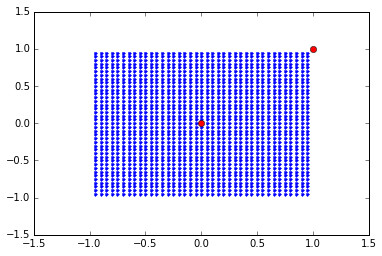

In [15]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

D = 0.05

def show(A, b, path, ax):
    C = A.shape[0]
    ax.axis((-1.5, 1.5, -1.5, 1.5))
    gr = np.mgrid[-1: 1: D, -1: 1: D]
    n, m = gr.shape[1], gr.shape[2]

    for i in xrange(n):
        for j in xrange(m):
            pt = (gr[0, i, j], gr[1, i, j])
            sm = np.sum(np.sign(A.dot(pt) - b))

            if (sm == -C):
                ax.plot(pt[0], pt[1], 'b.')
    
    for (x, y) in path:
        #print x, y
        ax.plot(x, y, 'ro')
    
# Demo
A = np.array([1, 0, -1, 0, 0, 1, 0, -1]).reshape((4,2))
b = np.array([1, 1, 1, 1])
show(A, b, [(0, 0), (1, 1)], plt)

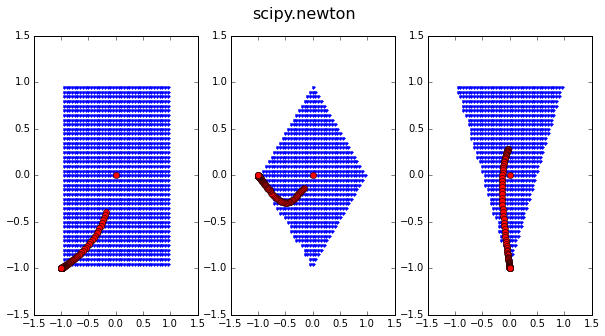

In [16]:
from scipy.optimize import fmin_ncg

eps = 1e-8

def go(A, b, c, nw=fmin_ncg):
    x = np.array([0., 0.])
    res = [x]
    t = 1.0
    mu = 1.1
    M = len(b)
    
    def f(x):
        res = t * c.dot(x)
        
        for i in xrange(M):
            res -= np.log(- A[i].dot(x) + b[i] )

        return res
    
    def fp(x):
        res = t * c
        
        for i in xrange(M):
            res += A[i] / (- A[i].dot(x) + b[i])
            
        return res
    
    def fhess(x):
        res = np.zeros((2, 2))
        
        for i in xrange(M):    
            res += np.outer(A[i], A[i]) / np.power(- A[i].dot(x) + b[i], 2) 
            
        return res
        
# if eps will be smaller than 0.001 we'll encounter log warnings.
    while M / t > 0.001:
        x = nw(f, x, fp, fhess=fhess, disp=False)
        t = t*mu
        res.append(x)
        
    return res

np.random.seed(42)
c1, c2, c3 = np.random.rand(2), np.random.rand(2), np.random.rand(2)

def test(fun, text):
    global c1, c2, c3
    f, axarr = plt.subplots(1, 3, figsize=(10,5))
    f.suptitle(text, fontsize=16)
    
    A = np.array([1, 0, -1, 0, 0, 1, 0, -1]).reshape((4,2))
    b = np.array([1, 1, 1, 1])
    res = fun(A, b, c1)
    show(A, b, res, axarr[0])
    
    A = np.array([1, 1, -1, 1, 1, -1, -1, -1]).reshape((4,2))
    b = np.array([1, 1, 1, 1])
    res = fun(A, b, c2)
    show(A, b, res, axarr[1])
    
    A = np.array([0, 1, 2, -1, -2, -1]).reshape((3,2))
    b = np.array([1, 1, 1])
    res = fun(A, b, c3)
    show(A, b, res, axarr[2])

test(go, 'scipy.newton')

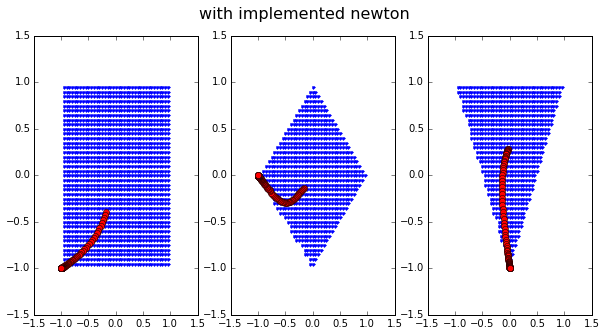

In [17]:
# with newton impl
from numpy.linalg import norm
import numpy
import sys

def go2(A, b, c):
    global eps
    
    def newton(f, x, fp, fhess, disp=False):
        prev = 1000
        
        while norm(f(x) - prev) > eps:
            prev = f(x)
            hess = fhess(x)

            if numpy.linalg.cond(hess) < 1. / sys.float_info.epsilon:
                x -= 0.01 * fp(x).dot(np.linalg.inv(hess))
            else:
                break

        return np.array(x)

    return go(A, b, c, newton)

test(go2, 'with implemented newton')

### Task 2

In [7]:
def GetMatrix(links,cities):

    A = np.zeros((len(cities), len(cities)));
    for i in xrange(0, len(links), 3):
        A[cities.index(links[i]), cities.index(links[i + 1])] =  links[i+2]
           
    return A        

In [8]:
import numpy as np
cities = ['Atlanta','Boston', 'Calgary', 'Charleston','Chicago','Dallas', 
          'Denver', 'Duluth', 'ElPaso','Helena', 'Houston', 'KansasCity', 'LasVegas',
          'LittleRock', 'LosAngeles', 'Miami', 'Montreal', 'Nashville',
          'NewOrleans', 'NewYork', 'OklahomaCity', 'Omaha', 'Phoenix',
          'Pittsburgh', 'Portland', 'Raleigh', 'SaintLouis','SaltLakeCity',
          'SanFrancisco','SantaFe', 'SaultStMarie', 'Seattle', 'Toronto',
          'Vancouver', 'Washington', 'Winnipeg'];

blue = ['Winnipeg','Helena',4,
    'Portland','SaltLakeCity',6,
    'Omaha','Chicago',4,
    'Montreal','NewYork',3,
    'KansasCity','SaintLouis',2,
    'SantaFe','OklahomaCity',3,
    'Atlanta','Miami',5];

blue = GetMatrix(blue,cities);

white = ['Calgary','Winnipeg',6,
    'Chicago','Toronto',4,
    'SaintLouis','Chicago',2,
    'Pittsburgh','NewYork',2,
    'SanFrancisco','SaltLakeCity',5,
    'Phoenix','Denver',5,
    'LittleRock','Nashville',3];

white = GetMatrix(white,cities);

green = ['Portland','SanFrancisco',5,
    'Helena','Denver',4,
    'SaintLouis','Pittsburgh',5,
    'LittleRock','NewOrleans',3,
    'ElPaso','Houston',6];

green = GetMatrix(green,cities);

red = ['Helena','Omaha',5,
    'Denver','OklahomaCity',4,
    'ElPaso','Dallas',4,
    'NewOrleans','Miami',6,
    'NewYork','Boston',2,
    'Duluth','Chicago',3];

red = GetMatrix(red,cities);

purple = ['Helena','SaltLakeCity',3,
    'Denver','Omaha',4,
    'Duluth','Toronto',6,
    'Charleston','Miami',4,
    'SanFrancisco','LosAngeles',3];
purple = GetMatrix(purple,cities);

orange = ['LasVegas','SaltLakeCity',3,
    'Helena','Duluth',6,
    'Chicago','Pittsburgh',3,
    'Denver','KansasCity',4,
    'NewYork','Washington',2,
    'Atlanta','NewOrleans',4];

orange = GetMatrix(orange,cities);

black = ['LosAngeles','ElPaso',6,
    'Winnipeg','Duluth',4,
    'SaultStMarie','Montreal',5,
    'Nashville','Raleigh',3];

black = GetMatrix(black,cities);

yellow = ['Seattle','Helena',6,
    'ElPaso','OklahomaCity',5,
    'Nashville','Pittsburgh',4];

yellow = GetMatrix(yellow,cities);

gray = ['Vancouver','Seattle',1,
    'Portland','Seattle',1,
    'Vancouver','Calgary',3,
    'Seattle','Calgary',4,
    'Calgary','Helena',4,
    'Winnipeg','SaultStMarie',6,
    'Duluth','SaultStMarie',3,
    'SaultStMarie','Toronto',2,
    'Toronto','Montreal',3,
    'Montreal','Boston',2,
    'Toronto','Pittsburgh',2,
    'LasVegas','LosAngeles',2,
    'LosAngeles','Phoenix',3,
    'Phoenix','ElPaso',3,
    'ElPaso','SantaFe',2,
    'Phoenix','SantaFe',3,
    'SantaFe','Denver',2,
    'Duluth','Omaha',2,
    'Omaha','KansasCity',1,
    'KansasCity','OklahomaCity',2,
    'OklahomaCity','Dallas',2,
    'Dallas','Houston',1,
    'Houston','NewOrleans',2,
    'Dallas','LittleRock',2,
    'OklahomaCity','LittleRock',2,
    'LittleRock','SaintLouis',2,
    'SaintLouis','Nashville',2,
    'Nashville','Atlanta',1,
    'Atlanta','Charleston',2,
    'Charleston','Raleigh',2,
    'Atlanta','Raleigh',2,
    'Raleigh','Washington',2,
    'Raleigh','Pittsburgh',2,
    'Washington','Pittsburgh',2];

gray = GetMatrix(gray,cities);

profit = blue*1.0+white*1.5+green*2.0+red*2.0+purple*2.5+orange*1.0+black*1.0+yellow*2.0+gray*1.0;

#TODO: symmetrize the matrix if necessary by uncommenting the next line
#profit_sym = np.dstack([profit, profit.transpose()]).max(axis=2)

costs = np.ones((len(cities),1))*10;

#TODO put your solution here

<img src="TicketToRide.png" />

__Solution__

Lets reformulate the problem as mincut problem. 
Lets 

{0: <matplotlib.text.Text at 0x7f1adb6b1050>,
 1: <matplotlib.text.Text at 0x7f1adb6b1510>,
 2: <matplotlib.text.Text at 0x7f1adb6b1950>,
 3: <matplotlib.text.Text at 0x7f1adb6b1d90>,
 4: <matplotlib.text.Text at 0x7f1adb6bb210>,
 5: <matplotlib.text.Text at 0x7f1adb6bb650>,
 6: <matplotlib.text.Text at 0x7f1adb6bba90>,
 7: <matplotlib.text.Text at 0x7f1adb6bbed0>,
 8: <matplotlib.text.Text at 0x7f1adb6c9350>,
 9: <matplotlib.text.Text at 0x7f1adb6c9790>,
 10: <matplotlib.text.Text at 0x7f1adb6c9bd0>,
 11: <matplotlib.text.Text at 0x7f1adb6d5050>,
 12: <matplotlib.text.Text at 0x7f1adb6d5490>,
 13: <matplotlib.text.Text at 0x7f1adb6e5f90>,
 14: <matplotlib.text.Text at 0x7f1adb6e5350>,
 15: <matplotlib.text.Text at 0x7f1adb74f8d0>,
 16: <matplotlib.text.Text at 0x7f1adb74f550>,
 17: <matplotlib.text.Text at 0x7f1adb745190>,
 18: <matplotlib.text.Text at 0x7f1adb745990>,
 19: <matplotlib.text.Text at 0x7f1adb739550>,
 20: <matplotlib.text.Text at 0x7f1adb7d8110>,
 21: <matplotlib.text.T

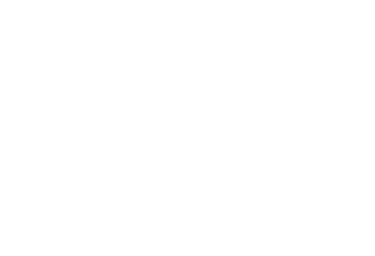

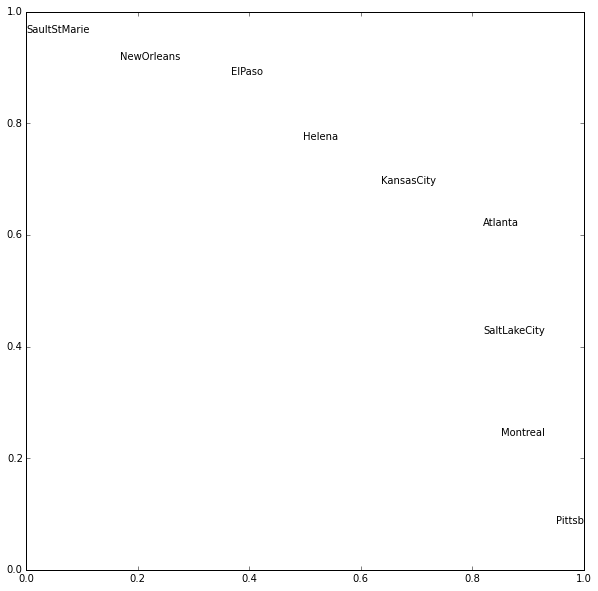

In [14]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
# import networkx as nx

